In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 23})

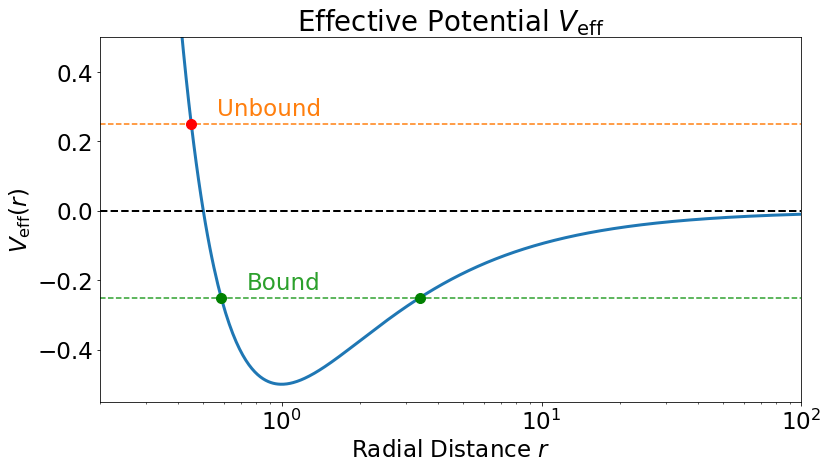

In [36]:
# Constants for the effective potential
G = 1.0  # Gravitational constant (normalized)
M = 1.0  # Mass of the central body (normalized)
L = 1.0  # Angular momentum (normalized)


# Use formulae for periapsis and apoapsis of the Keplerian orbit
def calculate_extrema(E, L, G=1.0, M=1.0):
    if E < 0:
        # Bound orbit: both periapsis and apoapsis exist
        periapsis = L**2 / (G * M * (1 + np.sqrt(1 + (2 * E * L**2) / (G * M)**2)))
        apoapsis = L**2 / (G * M * (1 - np.sqrt(1 + (2 * E * L**2) / (G * M)**2)))
        return periapsis, apoapsis
    elif E > 0:
        # Unbound orbit: only periapsis exists
        periapsis = L**2 / (G * M * (1 + np.sqrt(1 + (2 * E * L**2) / (G * M)**2)))
        return periapsis, None
    return None, None

# Function to compute the effective potential V_eff(r)
def effective_potential(r, M, L):
    return -G * M / r + L**2 / (2 * r**2)

# Define a range of radial distances r
r_min = 0.2
r = np.linspace(r_min, 100, int(1e+4))

# Compute the effective potential for the chosen values of M and L
V_eff = effective_potential(r, M, L)

# Find the minimum value of the effective potential
V_min = np.min(V_eff)

# Constants for energy levels
E_bound = 0.5*V_min  # Negative energy for a bound orbit
E_unbound = -E_bound  # Positive energy for an unbound orbit

# Corrected plotting code
plt.figure(figsize=(12, 7))
plt.plot(r, V_eff, label=r'$V_{\mathrm{eff}}(r)$', color='tab:blue', linewidth=3)

# Plot horizontal lines for the two energy levels
plt.axhline(E_bound, color='tab:green', linestyle='--', label=f'Bound energy $E = {E_bound}$')
plt.axhline(E_unbound, color='tab:orange', linestyle='--', label=f'Unbound energy $E = {E_unbound}$')

# Calculate and mark the periapsis and apoapsis for the bound orbit
periapsis_bound, apoapsis_bound = calculate_extrema(E_bound, L)
if periapsis_bound is not None:
    plt.plot(periapsis_bound, E_bound, 'go', markersize=10, label='Periapsis (Bound)')
if apoapsis_bound is not None:
    plt.plot(apoapsis_bound, E_bound, 'go', markersize=10, label='Apoapsis (Bound)')

# Calculate and mark the extremum for the unbound orbit (only periapsis)
periapsis_unbound, _ = calculate_extrema(E_unbound, L)
if periapsis_unbound is not None:
    plt.plot(periapsis_unbound, E_unbound, 'ro', markersize=10, label='Periapsis (Unbound)')

# Set the Y-axis range to show the minimum and some positive values
plt.ylim(V_min - 0.1*np.abs(V_min), np.abs(V_min))  # Showing some positive values as requested
plt.xlim(r_min, np.max(r))
plt.xscale('log')

# Labels and title
plt.title(r'Effective Potential $V_{\mathrm{eff}}$')
plt.xlabel(r'Radial Distance $r$')
plt.ylabel(r'$V_{\mathrm{eff}}(r)$')
#plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Horizontal line at V_eff = 0

# Add labels "Bound" and "Unbound" above the respective energy levels
plt.text(apoapsis_bound-2, E_bound + 0.05*np.abs(V_min), 'Bound', color='tab:green', ha='right')
plt.text(apoapsis_bound-2, E_unbound + 0.05*np.abs(V_min), 'Unbound', color='tab:orange', ha='right')


# Save the figure
plt.tight_layout()
plt.savefig("../Figures/kepler_veff_bound_and_unbound.png", format="png", dpi=300, transparent=False, facecolor='white')

# Show the plot
plt.show()